In [1]:
#default_exp ch01_problem02

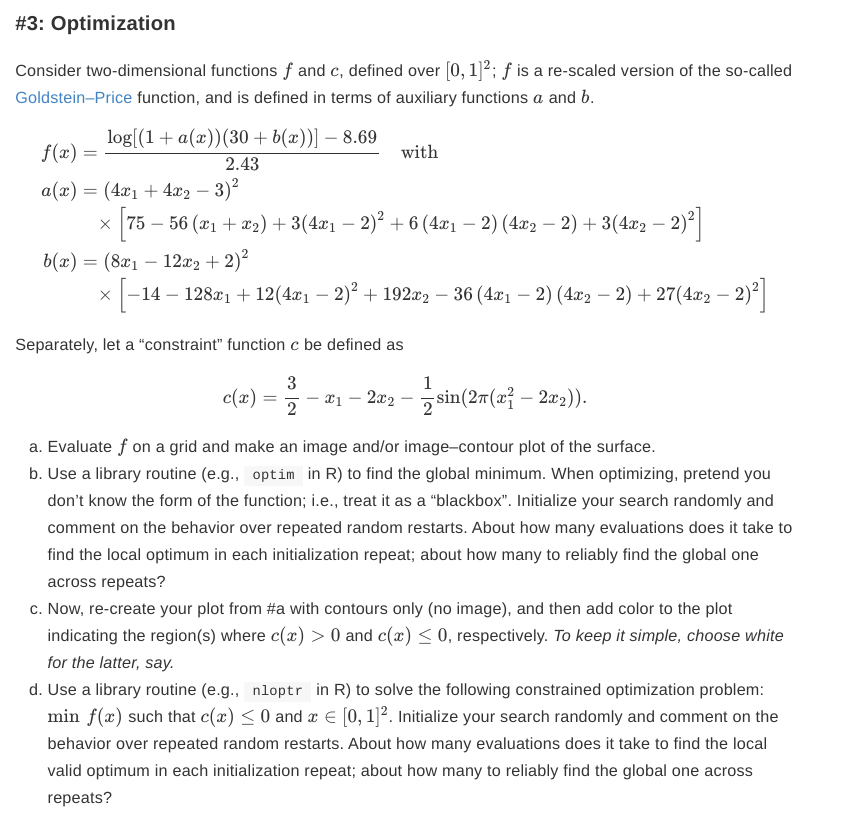

In [41]:
import pandas as pd
import numpy as np
import pyDOE
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook

In [35]:
def goldstein_price(x1, x2):
    log_arg = (1 + a(x1, x2)) * (30 + b(x1, x2))
    numerator = np.log(log_arg) - 8.69
    return numerator / 2.43

def a(x1, x2):
    left_term = (4*x1 + 4*x2 - 3)**2
    right_term = (
        75 - 
        56 * (x1 + x2) + 
        3*(4*x1 - 2)**2 +
        6*(4*x1 - 2)*(4*x2 - 2) +
        27*(4*x2 - 2)**2)
    return left_term * right_term

def b(x1, x2):
    left_term = (8*x1 - 12*x2 + 2)**2
    right_term = (
        -14 -
        128*x1 +
        12*(4*x1 - 2)**2 +
        192*x2 - 
        36*(4*x1 - 2)*(4*x2 - 2) +
        27*(4*x2 - 2)**2)
    return left_term * right_term
    
def c(x1, x2):
    return (
    3/2 -
    x1 -
    2*x2 -
    0.5*np.sin(2*np.pi * 
               (x1**2 - 2*x2)))

In [42]:
variables = ['x1', 'x2']
grid_matrix = pyDOE.lhs(2, samples=1000)
grid_df = pd.DataFrame(grid_matrix, columns=variables)
grid_df['y'] = grid_df.apply(lambda row: goldstein_price(row['x1'], row['x2']), axis=1)
display(grid_df.head())

,x1,x2,y
0,0.375855,0.643753,0.502191
1,0.533208,0.186025,-1.529966
2,0.750626,0.280208,0.203379
3,0.672928,0.277750,-0.469253
4,0.152504,0.696186,0.751139


In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(grid_df['x1'], grid_df['x2'], grid_df['y'], 50, cmap='binary')

<IPython.core.display.Javascript object>

TypeError: Input z must be 2D, not 1D